# Integration: Extra Examples

**OBJECTIVES**

- Use Riemann Sums to approximate Areas
- Develop and Implement Trapezoidal Rule for Area Approximation
- Introduce Monte Carlo methods for Area Approximation

## Riemann Sums

In [1]:
from IPython.display import IFrame
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:,.10f}'.format

In [2]:
drawing = IFrame(src = '', width = 400, height = 600)



$${\displaystyle S=\sum _{i=1}^{n}f(x_{i}^{*})\,\Delta x_{i}}$$

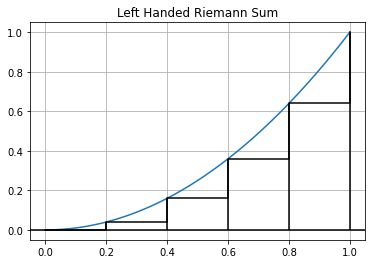

In [3]:
def f(x): return x**2
x = np.linspace(0, 1, 100)
plt.plot(x, f(x))
plt.axhline(color = 'black')
for xval in [0, 0.2, 0.4, 0.6, 0.8, 1.0]:
    plt.vlines(xval, 0, f(xval), color = 'black')
x2 = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.step(x2, f(x2), where = 'post', color = 'black')
plt.grid()
plt.title('Left Handed Riemann Sum');

In [4]:
drawing

### Symbolic Solution

In [5]:
import sympy as sy

In [6]:
x, p = sy.symbols('x p')

In [7]:
sy.integrate(x**2, x)

x**3/3

In [8]:
sy.integrate(x**p, x)

Piecewise((x**(p + 1)/(p + 1), Ne(p, -1)), (log(x), True))

In [9]:
sy.integrate(x**2, (x, 0, 1))

1/3

### Compare to our Approximation

In [10]:
def riemann(x, n):
    '''
    This function computes a left-handed
    riemann approximation for area under
    a function f over an interval x
    ======
    Arguments
    x = array; domain of interest
    n = integer; number of rectangles to use
    ======
    Returns
    area = float; area approximation
    '''
    #find the width
    width = (x[-1] - x[0])/n
    #where we find heights
    endpoints = [x[0] + width*i for i in range(n)]
    #find the heights
    heights = f(np.array(endpoints))
    #total area
    area = width*sum(heights)
    return area

In [11]:
x = np.linspace(0, 1, 100)

In [12]:
#approximation with 4 rectangles
riemann(x, 4)

0.21875

In [13]:
#error with 4 rectangles
1/3 - riemann(x, 4)

0.11458333333333331

In [14]:
#approximations for many n's
approxs = [riemann(x, i) for i in [4, 40, 400, 4000, 40_000, 400_000]]
#error in approximations
errors = [1/3 - approx for approx in approxs]

In [15]:
#dataframe of errors
error_df = pd.DataFrame({'subdivisions': [4, 40, 400, 4000, 40_000, 400_000], 
                         'riemann_area': approxs, 
                         'riemann_error': errors})

In [16]:
#examine the errors
error_df

,subdivisions,riemann_area,riemann_error
0,4,0.2187500000,0.1145833333
1,40,0.3209375000,0.0123958333
2,400,0.3320843750,0.0012489583
3,4000,0.3332083438,0.0001249896
4,40000,0.3333208334,0.0000124999
5,400000,0.3333320833,0.0000012500


### Trapezoid Rule

<center>
 <img src = https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/Trapezoid.svg/440px-Trapezoid.svg.png />
</center>

$$\text{Area} = \frac{a + b}{2} \times h$$

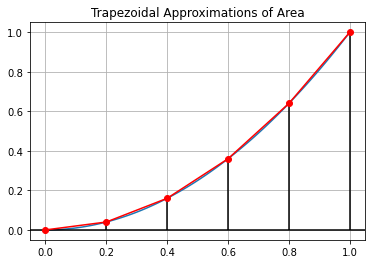

In [17]:
def f(x): return x**2
x = np.linspace(0, 1, 100)
plt.plot(x, f(x))
# plt.ylim(-2, 2)
plt.axhline(color = 'black')
for xval in [0, 0.2, 0.4, 0.6, 0.8, 1.0]:
    plt.vlines(xval, 0, f(xval), color = 'black')
x2 = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.plot(x2, f(x2), '-ro')
plt.grid();
plt.title('Trapezoidal Approximations of Area');

In [18]:
drawing

In [19]:
#domain
x = np.linspace(0, 1, 100)

In [20]:
#heights
heights = f(x)

In [21]:
np.array([2*f(i) for i in x2[1:-1]])

array([0.08, 0.32, 0.72, 1.28])

In [22]:
#areas
sum(f(x2[0]) + np.array([2*f(i) for i in x2[1:-1]]) + f(x2[-1]) )

6.4

In [23]:
.2*sum(f(x2[0]) + np.array([2*f(i) for i in x2[1:-1]]) + f(x2[-1]) )

1.2800000000000002

In [24]:
.2/2*sum(f(x2[0]) + 2*f(x2[1:-1]) + f(x2[-1]))

0.6400000000000001

In [25]:
1/3 - .2/2*sum(f(x2[0]) + 2*f(x2[1:-1]) + f(x2[-1]))

-0.3066666666666668

In [26]:
def trapezoid_approx(x, n):
    '''
    This function computes a 
    trapezoidal approximation for 
    the area under function f on x
    ======
    Arguments
    x = array; domain of interest
    n = integer; number of trapezoids to use
    ======
    Returns
    area = float; area approximation
    '''
    width = (x[-1] - x[0])/n
    bases = np.array([x[0] + i*width for i in range(n + 1)])
    heights = f(bases)
    areas = f(heights[0]) + sum(2*(heights[1:-1])) + f(heights[-1])
    return width/2*areas

In [27]:
trapezoid_approx(x, 4)

0.34375

In [28]:
#approximations for many n's
approxs = [trapezoid_approx(x, i) for i in [4, 40, 400, 4000, 40_000, 400_000]]
#error in approximations
errors = [round(abs(1/3 - approx), 10) for approx in approxs]

In [29]:
error_df['triangular_approximation'] = approxs
error_df['triangular_errors'] = errors

In [30]:
error_df

,subdivisions,riemann_area,riemann_error,triangular_approximation,triangular_errors
0,4,0.2187500000,0.1145833333,0.3437500000,0.0104166667
1,40,0.3209375000,0.0123958333,0.3334375000,0.0001041667
2,400,0.3320843750,0.0012489583,0.3333343750,0.0000010417
3,4000,0.3332083438,0.0001249896,0.3333333438,0.0000000104
4,40000,0.3333208334,0.0000124999,0.3333333334,0.0000000001
5,400000,0.3333320833,0.0000012500,0.3333333333,0.0000000000


### Alternative Approach: Monte Carlo Integration

<center>
 <img src = https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Le_casino_de_Monte-Carlo.JPG/440px-Le_casino_de_Monte-Carlo.JPG />
 </center>

In [31]:
x = np.linspace(0, 1, 1000)

In [32]:
random_x = np.random.choice(x)

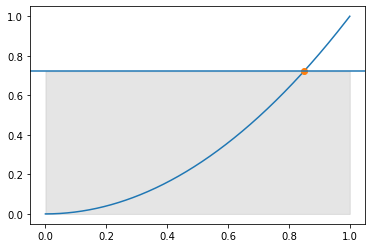

In [33]:
plt.plot(x, f(x))
plt.plot(random_x, f(random_x), 'o')
plt.axhline(f(random_x))
plt.fill_between(x, f(random_x), color = 'gray', alpha = 0.2)

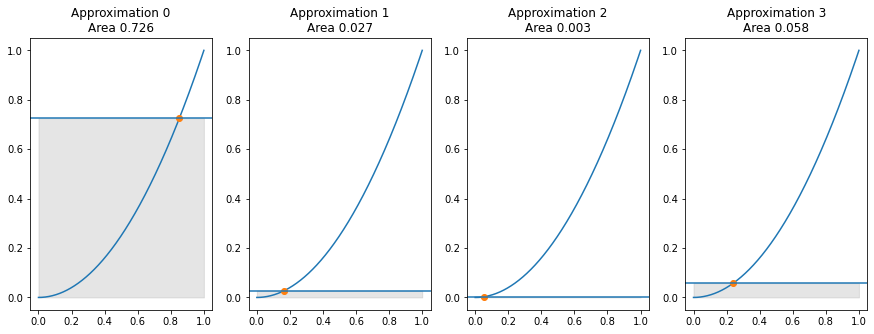

In [34]:
fig, ax = plt.subplots(1, 4, figsize = (15, 5))
for i in range(4):
    random_x = np.random.choice(x)
    ax[i].plot(x, f(x))
    ax[i].plot(random_x, f(random_x), 'o')
    ax[i].axhline(f(random_x))
    ax[i].fill_between(x, f(random_x), color = 'gray', alpha = 0.2)
    ax[i].set_title(f'Approximation {i}\nArea {f(random_x):.3f}')

$$\text{Area} = \frac{1}{n} \sum_{i = 1}^n \text{area}_i $$

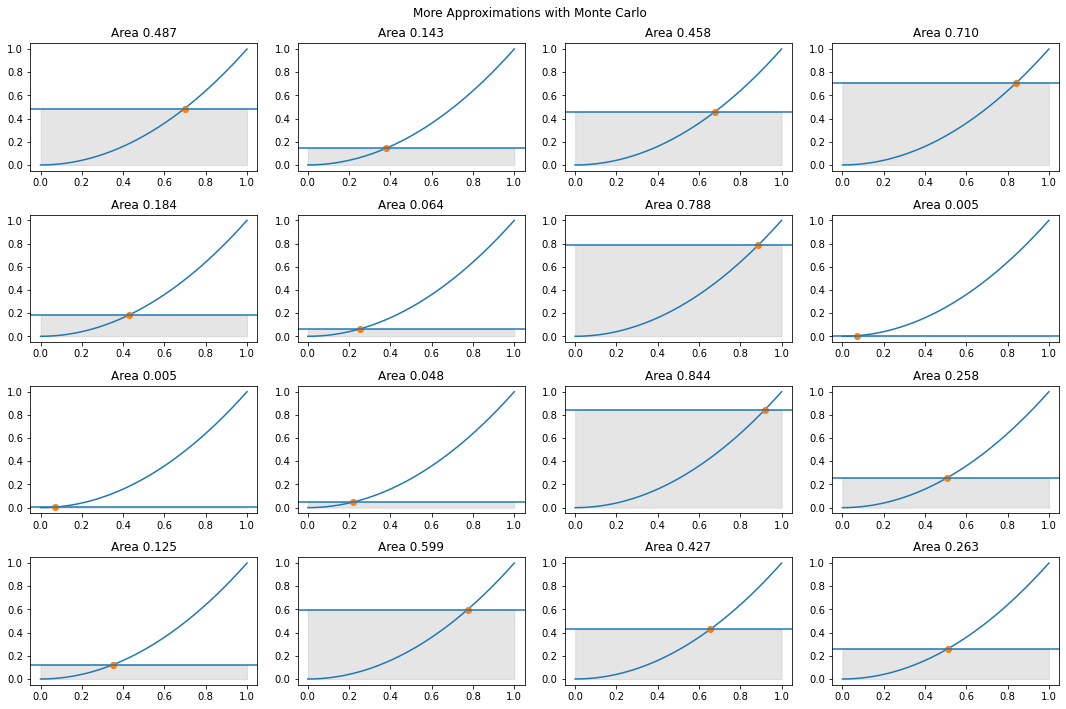

In [35]:
fig, ax = plt.subplots(4, 4, figsize = (15, 10))
for i in range(4):
    for j in range(4):
        random_x = np.random.choice(x)
        ax[i,j].plot(x, f(x))
        ax[i,j].plot(random_x, f(random_x), 'o')
        ax[i,j].axhline(f(random_x))
        ax[i,j].fill_between(x, f(random_x), color = 'gray', alpha = 0.2)
        ax[i,j].set_title(f'Area {f(random_x):.3f}')
fig.suptitle('More Approximations with Monte Carlo');
plt.tight_layout();

In [36]:
np.random.choice(x, 100)

array([0.42642643, 0.97497497, 0.96596597, 0.42342342, 0.0970971 ,
       0.76776777, 0.52152152, 0.67267267, 0.36636637, 0.43743744,
       0.        , 0.34634635, 0.4044044 , 0.31831832, 0.72872873,
       0.77177177, 0.78878879, 0.97897898, 0.08508509, 0.5015015 ,
       0.15515516, 0.19419419, 0.52652653, 0.87587588, 0.43443443,
       0.95595596, 0.32032032, 0.14914915, 0.7987988 , 0.25725726,
       0.74374374, 0.81581582, 0.56456456, 0.46546547, 0.64664665,
       0.33233233, 0.80780781, 0.50750751, 0.47047047, 0.53653654,
       0.33433433, 0.42342342, 0.78278278, 0.15115115, 0.64664665,
       0.55355355, 0.55355355, 0.63763764, 0.22222222, 0.95595596,
       0.9049049 , 0.63863864, 0.45945946, 0.00900901, 0.64864865,
       0.79079079, 0.26026026, 0.91891892, 0.66266266, 0.85285285,
       0.11311311, 0.82082082, 0.14014014, 0.38538539, 0.2952953 ,
       0.47047047, 0.40840841, 0.70770771, 0.92292292, 0.54654655,
       0.9039039 , 0.60860861, 0.41441441, 0.65265265, 0.13013

In [37]:
np.mean(f(np.random.choice(x, 4)))

0.18535727920112305

In [38]:
approxs = [np.mean(f(np.random.choice(x, i))) for i in [4, 40, 400, 4000, 40_000, 400_000]]
errors = [abs(1/3 - approx) for approx in approxs]

In [39]:
error_df['monte_carlo_approx'] = approxs
error_df['monte_carlo_error'] = errors

In [40]:
error_df

,subdivisions,riemann_area,riemann_error,triangular_approximation,triangular_errors,monte_carlo_approx,monte_carlo_error
0,4,0.2187500000,0.1145833333,0.3437500000,0.0104166667,0.4621864106,0.1288530773
1,40,0.3209375000,0.0123958333,0.3334375000,0.0001041667,0.3422983043,0.0089649710
2,400,0.3320843750,0.0012489583,0.3333343750,0.0000010417,0.3308056806,0.0025276528
3,4000,0.3332083438,0.0001249896,0.3333333438,0.0000000104,0.3398036668,0.0064703334
4,40000,0.3333208334,0.0000124999,0.3333333334,0.0000000001,0.3349604147,0.0016270813
5,400000,0.3333320833,0.0000012500,0.3333333333,0.0000000000,0.3335770901,0.0002437568


### Problems

1. Compare the left-handed riemann approximation with $n = 100$, trapezoidal approximation with $n = 100$, and monte carlo approximation with $n = 100$ for the following functions on the given interval:

- $f(x) = \sin(\sin(x) - x)dx \quad [0, 2\pi]$
- $g(x) = \cos^{2020}(x) dx \quad [0, 2\pi]$

2. Approximating $\pi$.  The circular region in the first quadrant can be defined by $y = \sqrt{1 - x^2}$.  We can determine an approximation for $\pi$ by doing the following:

- Drop many random points on the square.
- If the points are less than $\sqrt{1 - x^2}$ we will count them, if they are outside the circle we will not
- Determine the ratio of points dropped to points counted, multiply by 4

Write a small python program to conduct this simulation and plot the results coloring the points accepted and rejected blue and red respectively.  How good was your approximation?